<a href="https://colab.research.google.com/github/DhibarSumit10/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

## **Introduction**

<b>**Customer segmentation is the practice of dividing a company's customers into groups that reflect similarity among customers in each group based on their shared behaviour or other attributes. Customer segmentation has the potential to allow marketers to address each customer in the most effective way. Using the large amount of data available on customers (and potential customers), a customer segmentation analysis allows marketers to identify discrete groups of customers with a high degree of accuracy based on demographic, behavioral and other indicators.The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business. The groups should be homogeneous within them and should also be heterogeneous to each other. The main goal is to identify customers that are most profitable and loyal and the ones who churned out, to prevent further loss of customers by redefining company policies. Having a large number of customers, each with different needs it is difficult to find which customer is most important for business and target them with an appropriate strategy.**<b>

**The content of the notebook includes :-**

* **Data Preparation**
* **Data Preprocessing**
* **Feature Engineering**
* **Exploratory Data Analysis**
* **Model Building**
* **Conclusion**

#**Data Preparation**

###**1. Importing The Libraries and The Dataset**

In [ ]:
# Importing Required Libraries for our analysis

import pandas as pd
import numpy as np

# For plots and visualizations

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits import mplot3d
from yellowbrick.cluster import SilhouetteVisualizer

# To scale the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Different Clustering Algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# To get optimal number of clusters in hierarchical clustering

from scipy.cluster.hierarchy import dendrogram, linkage

# Matrics to evaluate the clusters
from sklearn.metrics import silhouette_score, silhouette_samples

# To avoid unnecessary warnings, let's import warnings also
import warnings
warnings.filterwarnings('ignore')

###**2. Let's Mount The Drive and Import The Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Let's define url path of the dataset

path = '/content/drive/MyDrive/Colab Notebooks/Online Retail Customer Segmentation - SUMIT KUMAR DHIBAR/Online Retail.xlsx'

# Now let's import dataset to crate a dataframe

cust_df = pd.read_excel(path)

###**3. Understanding the Dataset**

In [ ]:
# Let's check the shape of the dataframe

print('Shape of the dataset is :', cust_df.shape)

Shape of the dataset is : (541909, 8)


* **In our dataset we have 541909 rows and 8 columns.**



In [ ]:
# Checking all the columns present in our dataset

cust_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Checking top 5 records in DataFrame

cust_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Checking bottom 5 records in DataFrame

cust_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# Let's check the datatypes and null values of dataset

cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


* **As it can be see from above that CustomerId, Description columns are having null values.**

In [ ]:
# Let's check the statistical description of the dataset

cust_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


### <b>4. Data Description </b>

### <b>Attribute Information : </b>

*  **InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
*  **StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
*  **Description:** Product (item) name. Nominal.
*  **Quantity:** The quantities of each product (item) per transaction. Numeric.
*  **InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.
*  **UnitPrice:** Unit price. Numeric, Product price per unit in sterling.
*  **CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
*  **Country:** Country name. Nominal, the name of the country where each customer resides.

#**Data Preprocessing**

###**1. Missing Value Analysis**

**Real world data often has a lot of missing values. The cause of missing values can be failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many of the machine learnng algorithms do not support missing values.**

In [ ]:
# Let's check the total missing data

cust_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

* **It can be seen from above that there are missing data in our dataset.**

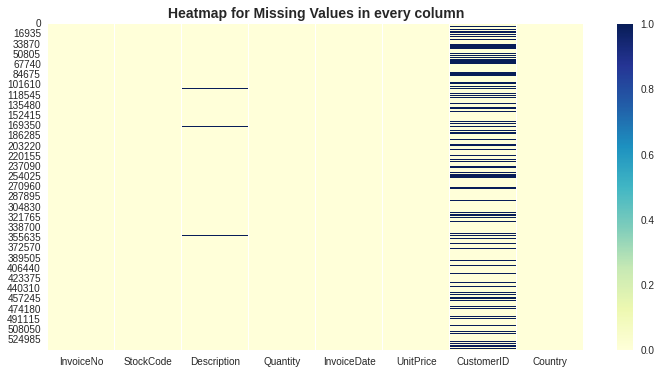

In [ ]:
# Checking for missing values in our dataset with the help of heatmap.

plt.figure(figsize = (12,6))
sns.heatmap(cust_df.isnull(), cmap = 'YlGnBu')
plt.title('Heatmap for Missing Values in every column', weight = 'bold', fontsize = 14)
plt.show();

In [ ]:
# Percentage of missing data per category

Total_missing_data = cust_df.isnull().sum().sort_values(ascending = False)
Total_percentage = (cust_df.isnull().sum() / cust_df.isnull().count()).sort_values(ascending = False)*100
missing_data_concat = pd.concat([Total_missing_data, round((Total_percentage),2)], axis = 1, keys = ["Total No of Missing Values", "Percentage of Missing Values"])
missing_data = missing_data_concat[missing_data_concat['Total No of Missing Values']>0]
missing_data

,Total No of Missing Values,Percentage of Missing Values
CustomerID,135080,24.93
Description,1454,0.27


* **It is clear from above that CustomerID has the highest percentage of missing values followed by Description column.**

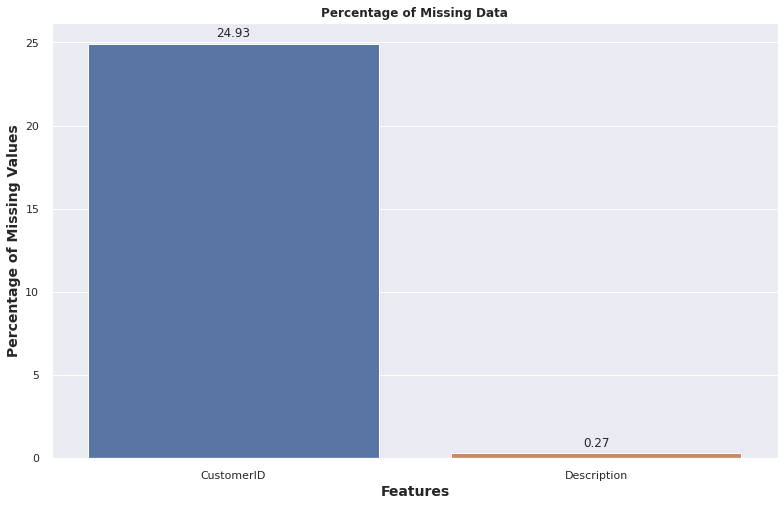

In [ ]:
# Let's visualize the percentage of missing values

plt.figure(figsize = (13,8))
sns.set(style = 'darkgrid')
eval = sns.barplot(x = missing_data.index, y = missing_data['Percentage of Missing Values'], data = missing_data)
plt.title('Percentage of Missing Data', weight = 'bold')
plt.xlabel('Features', fontsize = 14, weight = 'bold')
plt.ylabel('Percentage of Missing Values', fontsize = 14, weight = 'bold')

for i in eval.patches:
   eval.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show();

**As we can see from above 'CustomerID' has the highest percentage of missing values followed by 'Description' column - these features are having missing values. We will treat them as we go ahead in our analysis.**

In [ ]:
# Total Number of Null Values

print("Total number of null values in the data set : ", cust_df.isna().sum().sum())

# Let's count all the rows which contain missing values

count = 0
for i in cust_df.isna().sum(axis = 1):
  if i>0:
    count = count + 1
print('Total number of rows with missing values is ', count)
print(f'Percentage of rows which are having missing values in the entire dataset : {round((count/len(cust_df.index))*100, 2)}%')

Total number of null values in the data set :  136534
Total number of rows with missing values is  135080
Percentage of rows which are having missing values in the entire dataset : 24.93%


**As it is not possible to impute CustomerID column with some value, we will not be able to form any clusters with those missing CustomerID. We will drop the missing values from the dataset in our further analysis.**

### **2. Handling Missing Data**

In [ ]:
# Let's first check the total number of unique values in every feature of the dataset

for i in cust_df.columns.tolist():
  print(f"Total number of unique values in '{i}' is : ", cust_df[i].nunique())

Total number of unique values in 'InvoiceNo' is :  25900
Total number of unique values in 'StockCode' is :  4070
Total number of unique values in 'Description' is :  4223
Total number of unique values in 'Quantity' is :  722
Total number of unique values in 'InvoiceDate' is :  23260
Total number of unique values in 'UnitPrice' is :  1630
Total number of unique values in 'CustomerID' is :  4372
Total number of unique values in 'Country' is :  38


In [ ]:
# Let's drop the rows having null values

cust_df.dropna(subset = ['CustomerID'], inplace = True)


In [ ]:
# Let's check the shape of the dataset after removing all the rows having null values

print('Shape of the refreshed dataset is :', cust_df.shape)

Shape of the refreshed dataset is : (406829, 8)


In [ ]:
# Let's check the total missing data, if there is any

cust_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Hurray! As it can be seen from above that we have successfully handled all the missing values in the dataset.**

###**3. Handling Duplicate Data**

**It is important to remove duplicate records from the dataset, duplicate records may come from wrong collection of the data, it will add extra weight to our dataset and also increase time of the training.**

In [ ]:
# Let's check if any duplicate is present

print('Total number of duplicate rows :', cust_df.duplicated().sum())

Total number of duplicate rows : 5225


In [ ]:
# Duplicate record gives extra weight to the dataset, it is better to remove them

cust_df.drop_duplicates(inplace = True)

# Let's check the shape of the dataset after removing all the duplicate values

print('Shape of the dataset after removing duplicate is :', cust_df.shape)

Shape of the dataset after removing duplicate is : (401604, 8)


###**Let's change the datatype of the columns** 

In [ ]:
# Let's change the datatype of 'Quantity', 'UnitPrice' and 'CustomerID' column to the Integer

cust_df['Quantity'] = cust_df['Quantity'].astype(int)

cust_df['UnitPrice'] = cust_df['UnitPrice'].astype(int)

cust_df['CustomerID'] = cust_df['CustomerID'].astype(int)

###**Let's check why 'Invoice No' column is having object datatype.**

In [ ]:
# Let's workout on the object column

print('Value count for feature : InvoiceNo')
print('\n')
print(cust_df['InvoiceNo'].value_counts())

Value count for feature : InvoiceNo


576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
C560912      1
560913       1
560917       1
572879       1
553049       1
Name: InvoiceNo, Length: 22190, dtype: int64


In [ ]:
# Let's check 'Invoice No' which contains letter 'C'

cust_df['InvoiceNo'] = cust_df['InvoiceNo'].astype(str)

cust_df[cust_df['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1,17315,United Kingdom


**As it is clear from the above observation that 'InvoiceNo' column is having 'C' at begining , which indicates 'Cancellation'. We will remove those cancelled 'InvoiceNo' as we go ahead in our analysis.**

In [ ]:
# Let's drop those records from 'InvoiceNo' column, which contains 'C' in the begining

cust_df = cust_df[~ cust_df['InvoiceNo'].str.contains('C')]

# Let's check the shape of the dataset after removing all the Cancellation rows

print('Shape of the dataset after removing Cancellation is :', cust_df.shape)

Shape of the dataset after removing Cancellation is : (392732, 8)


In [ ]:
# Let's change the datatype of 'InvoiceNo' column to the Integer

cust_df['InvoiceNo'] = pd.to_numeric(cust_df['InvoiceNo'])

cust_df['InvoiceNo'] = cust_df['InvoiceNo'].astype(int)

In [ ]:
# Let's check the info of the dataset after doing operations on the datatypes

cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  int64         
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  int64         
 6   CustomerID   392732 non-null  int64         
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 27.0+ MB


**Yes! so we have converted 'InvoiceNo', 'Quantity', UnitPrice', 'CustomerID' columns to integer datatype.**

#**Feature Engineering**

In [ ]:
# Creating new features from the 'InvoiceDate' column

cust_df['year'] = cust_df['InvoiceDate'].apply(lambda x: x.year)
cust_df['month'] = cust_df['InvoiceDate'].apply(lambda x: x.month_name())
cust_df['day'] = cust_df['InvoiceDate'].apply(lambda x: x.day_name())
cust_df['hour'] = cust_df['InvoiceDate'].apply(lambda x: x.hour)

In [ ]:
# Creating a new feature 'Total Amount' from 'unit Price' and 'Quantity' column
# 'Total Amount' = 'Unit Price' * 'Quantity'

cust_df['Total Amount'] = cust_df['Quantity'] * cust_df['UnitPrice']

In [ ]:
# Creating a new feature 'Time type' based on hours to define whether its 'morning' , 'Afternoon' or 'Evening'

def time_type(time):
  if (time > 5 and time < 12):
    return 'Morning'
  elif(time > 11 and time < 18):
    return 'Afternoon'
  else:
    return 'Evening'  

In [ ]:
cust_df['Time_type'] = cust_df['hour'].apply(time_type)

In [ ]:
# Let's check the dataset

cust_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,day,hour,Total Amount,Time_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2,17850,United Kingdom,2010,December,Wednesday,8,12,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom,2010,December,Wednesday,8,18,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2,17850,United Kingdom,2010,December,Wednesday,8,16,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom,2010,December,Wednesday,8,18,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom,2010,December,Wednesday,8,18,Morning


**Yes! we have successfully created 6 new columns ['year', 'month', 'day', 'hour', 'Total Amount', 'Time Type'] from the dataset.**

#**Exploratory Data Analysis**

**Why do we perform EDA ?**

▶  An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns and relationships that are not readily apparent. 

##**Univariate analysis**

###**Let's plot top 10 values based on frequency of each column**

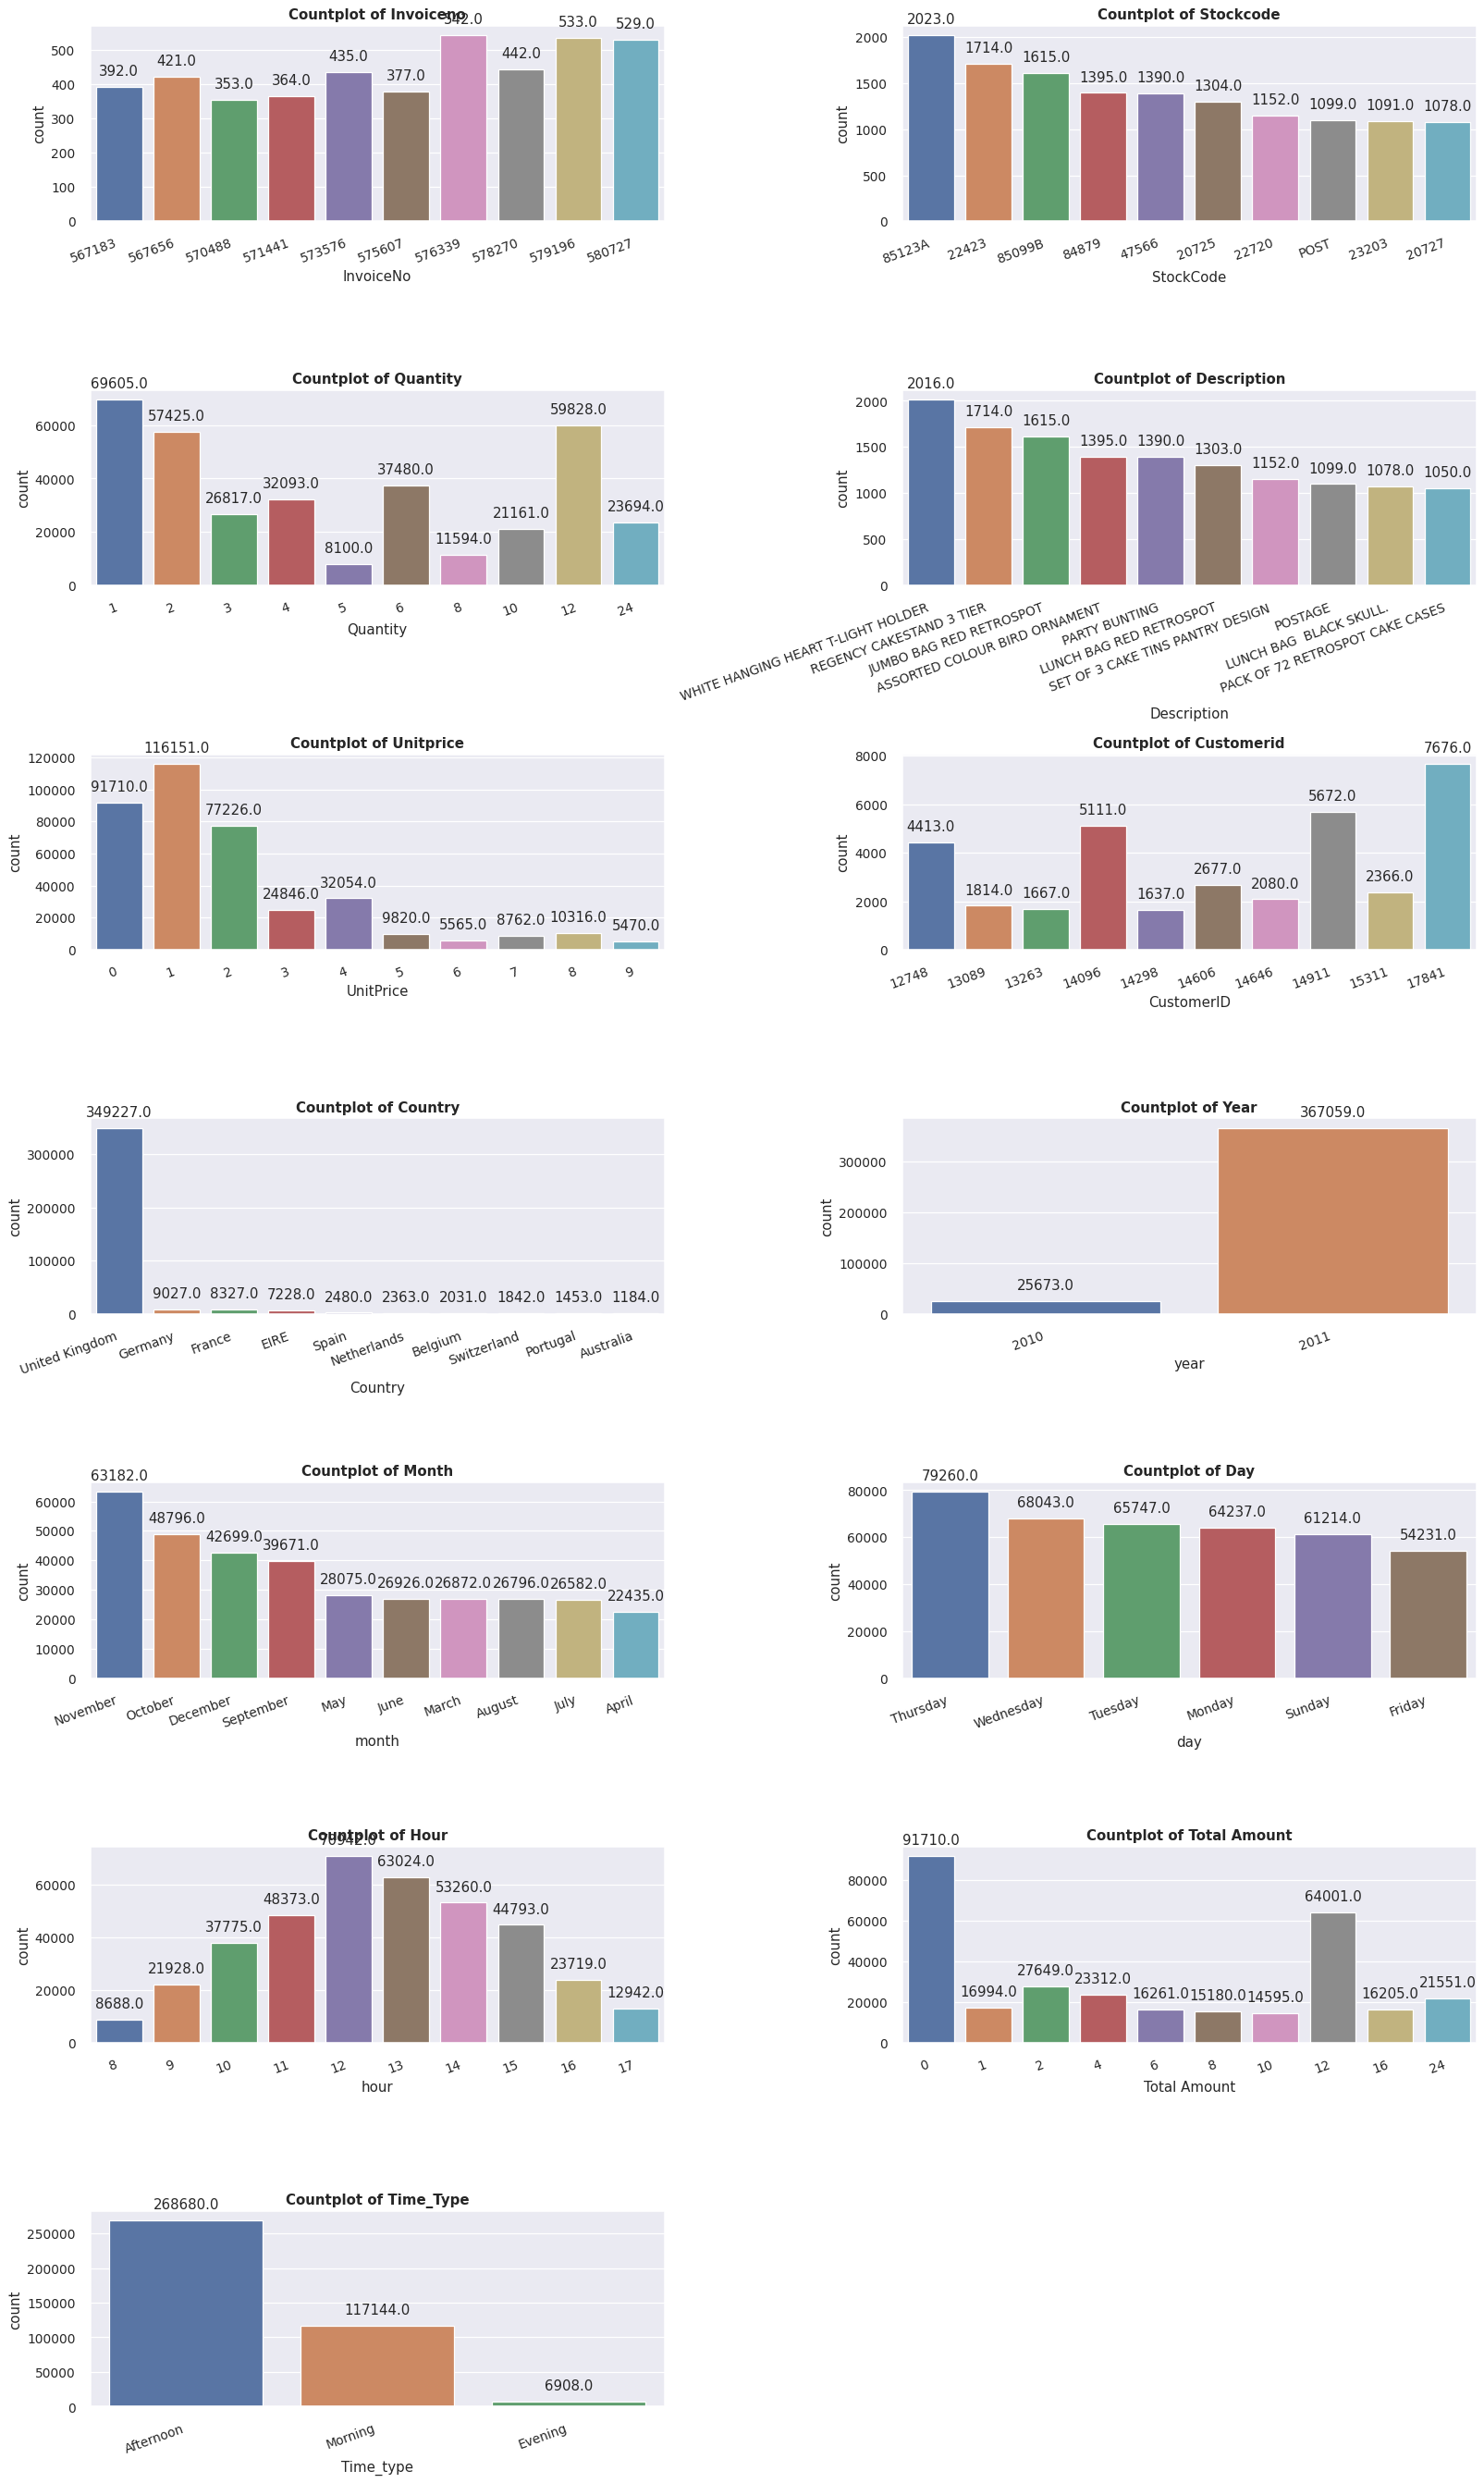

In [ ]:
# First thing first - Let's define our target columns required to be analysed

column = ['InvoiceNo', 'StockCode', 'Quantity', 'Description', 'UnitPrice', 'CustomerID', 'Country', 'year', 'month', 'day', 'hour',
          'Total Amount', 'Time_type']

# Plotting countplots for different columns of our dataset

sns.set_style('darkgrid')
plt.figure(figsize = (18,30), dpi = 90)
for index, col in enumerate (column):
  plt.subplot(7,2,index+1)
  counts = cust_df[col].value_counts().reset_index().head(10)
  counts.rename(columns = {'index' : col, col : 'count'}, inplace = True)
  eval = sns.barplot(x= col, y = 'count', data = counts)
  plt.xticks(rotation = 20, ha = 'right')
  plt.title(f'Countplot of {col.title()}', weight = 'bold')
  plt.tight_layout()
  for i in eval.patches:
    eval.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show();

###**Let's plot bottom 10 values based on frequency of each column**

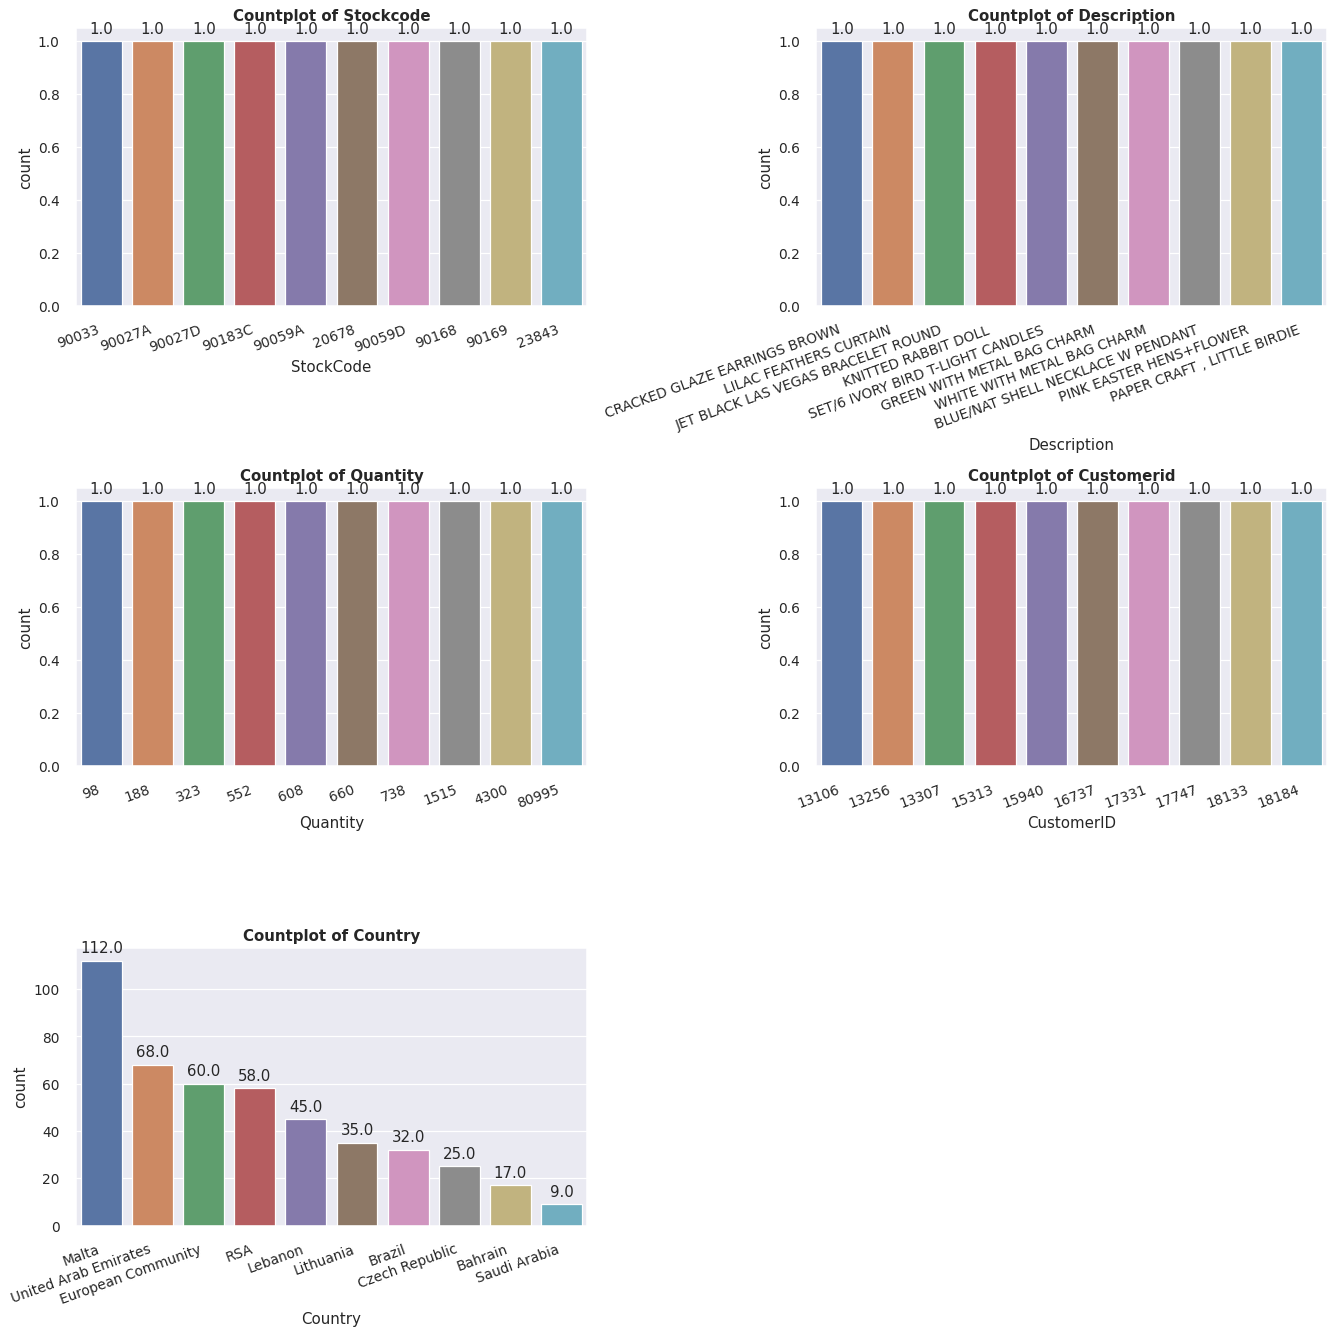

In [ ]:
# First thing first - Let's define our target columns required to be analysed

b_column = ['StockCode' ,'Description','Quantity', 'CustomerID', 'Country']

# Plotting countplots for different columns of our dataset

sns.set_style('darkgrid')
plt.figure(figsize = (15,15), dpi = 90)
for index, col in enumerate (b_column):
  plt.subplot(3,2,index+1)
  counts = cust_df[col].value_counts().reset_index().tail(10)
  counts.rename(columns = {'index' : col, col : 'count'}, inplace = True)
  eval =  sns.barplot(x = col, y = 'count', data = counts)
  plt.xticks(rotation = 20, ha = 'right')
  plt.title (f'Countplot of {col.title()}', weight = 'bold')
  plt.tight_layout()
  for i in eval.patches:
     eval.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

###**Observations drawn from the above Univariate Analysis are as follows:**

* **'WHITE HANGING HEART T-LIGHT HOLDER' (Stock Code - 85123A ), 'REGENCY CAKESTAND 3 TIER' (Stock Code - 22423) are the top 2 most ordered products.**
* **Most customers are from 'United Kingdom' also considerable number of customers are also from 'Germany' , 'France', 'Eire' and 'Spain'. Whereas 'Saudi Arabia', 'Bahrain', 'Czech Republic', 'Brazil' and 'Lithuania' has least number of customers.**
* **Most of the customer have purchased items in the month of 'October', 'November', 'December' the reason may be most of the festivals are in these months. Less number of customers have purchased the items in the month of 'January', 'February', 'April'.**
* **There are no orders placed on 'Saturdays', the reason maybe all retail shop stay closed on this day.**
* **Most of the customers have purchased the items in Afternoon, moderate number of customer have purchased the items in Morning and least number of customers in Evening.**

###**Let's analyse Distributions of 'Total Amount' , 'Quantity' and 'Unit Price' columns.**

**Things to keep in mind :** 

* **Positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer, which means mean>median>mode**


* **Negatively skewed (also known as left-skewed) distribution is a type of distribution in which more values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer,which means mean<median<mode**

* **For symmetric graph mean=median=mode**

In [ ]:
# Let's plot the description of each of the columns

dis_col = ['Total Amount', 'Quantity', 'UnitPrice']

for i in dis_col:
  print('\n')
  print(f'Statistical Description of the feature : {i}')
  print('--'*25)
  print(cust_df[i].describe([0.75, 0.90, 0.95, 0.99]))



Statistical Description of the feature : Total Amount
--------------------------------------------------
count    392732.000000
mean         16.217746
std         297.867076
min           0.000000
50%           8.000000
75%          14.000000
90%          24.000000
95%          48.000000
99%         160.000000
max      161990.000000
Name: Total Amount, dtype: float64


Statistical Description of the feature : Quantity
--------------------------------------------------
count    392732.000000
mean         13.153718
std         181.588420
min           1.000000
50%           6.000000
75%          12.000000
90%          24.000000
95%          36.000000
99%         120.000000
max       80995.000000
Name: Quantity, dtype: float64


Statistical Description of the feature : UnitPrice
--------------------------------------------------
count    392732.00000
mean          2.55160
std          22.23584
min           0.00000
50%           1.00000
75%           3.00000
90%           6.00000
95%   

**As it can be seen from above that only 1 % of values in all 3 columns has the maximum price or Quantity range, it can be said that the distribution plots will be very much skewed.**

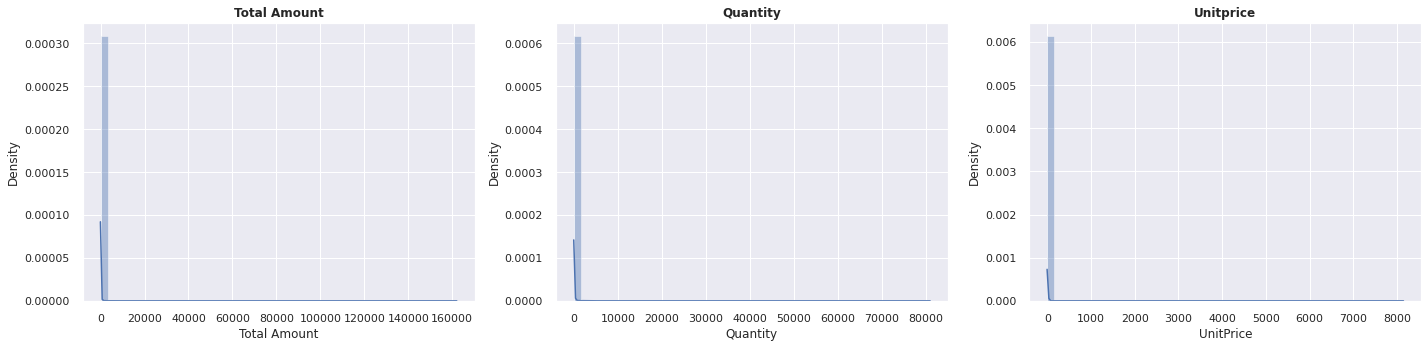

In [ ]:
# Visualizating the distributions of different columns

plt.figure(figsize = (20,5))
for n,col in enumerate (dis_col) :
  plt.subplot(1,3,n+1)
  sns.distplot(cust_df[col])
  plt.title(col.title(), weight = 'bold')
  plt.tight_layout()

###**Observations drawn from the above Distribution plot analysis are as follows:**

* **All the plots shows very skewed( Positively skewed ) distribution because most of the values are clustered around the left side of the distribution while the right tail of the ditribution are longer, which means mean > median > mode.**

**Why we use Log Transformation ?**

▶  When our original continuous data does not follow the bell curve, we can use log transformation on this data to make it as 'normal' as possible, so the analysis result from the data becomes more valid.

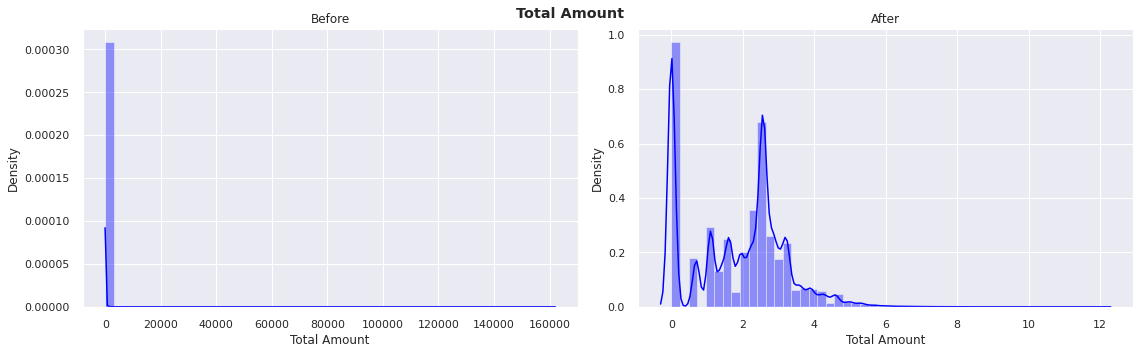

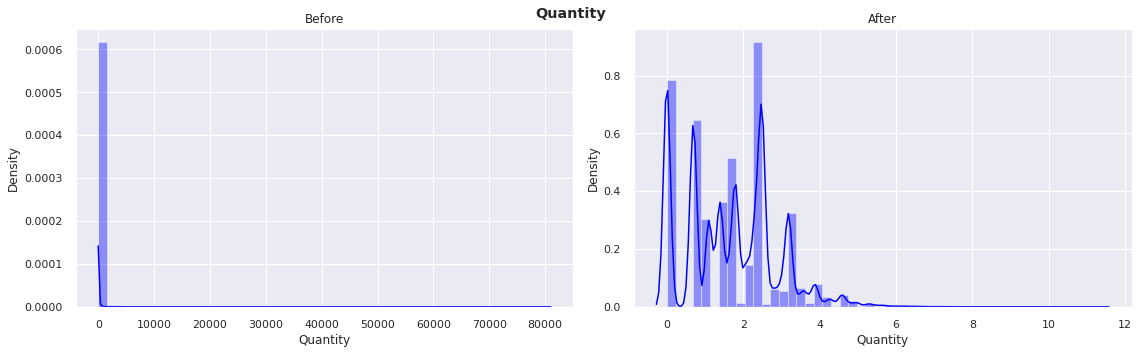

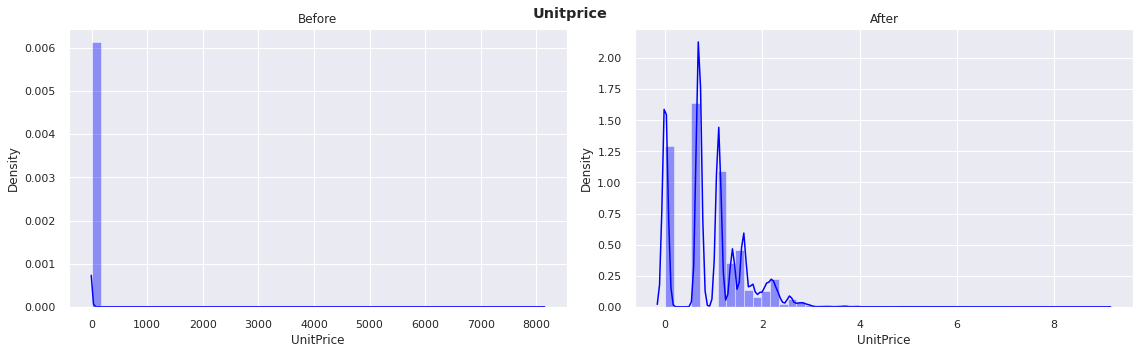

In [ ]:
# Let's apply log transformation on skewed clumns

for column in dis_col :
  fig, axes = plt.subplots(1, 2, figsize= (16,5) )
  sns.distplot(cust_df[column], ax = axes[0], color = 'blue').set(title = 'Before')
  try :
     sns.distplot(np.log(cust_df[column]), ax = axes[1], color = 'blue').set(title = 'After')
  except :   
     sns.distplot(np.log1p(cust_df[column]), ax = axes[1], color = 'blue').set(title = 'After')
  plt.suptitle(f'{column.title()}',weight='bold')
  plt.tight_layout()
  fig.show()

**It can be seen from above that after applying log transformation the distribution plot looks comparatively better than being skewed.**

##**Bivariate analysis**

###**1. Let's analyse top 5 countries with the most customer.**

In [ ]:
# First let's see the dataframe of top 5 Countries with most customers

country_cust = cust_df.groupby('Country')['CustomerID'].nunique().reset_index().sort_values('CustomerID', ascending = False)
country_cust.rename(columns = {'CustomerID' : 'Customer_count'}, inplace = True)
country_cust.head()

,Country,Customer_count
35,United Kingdom,3921
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25


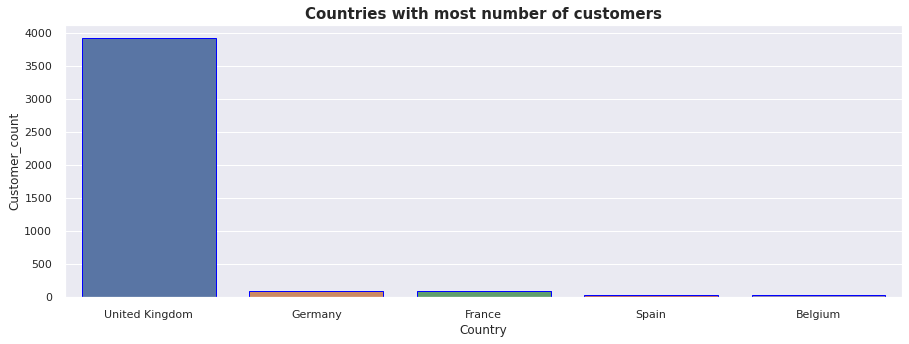

In [ ]:
# Let's plot a barplot to visualize the top 5 countries with most number of customer

plt.figure(figsize = (15,5))
sns.barplot(x = 'Country', y = 'Customer_count', data = country_cust.head(5), edgecolor = 'blue')
plt.title('Countries with most number of customers', weight = 'bold', fontsize = 15)
plt.show();

**It is clear from above that 'United Kingdom' has most number of customers than any other countries.**

###**2. Let's analyse top 5 countries with the most orders placed.**

In [ ]:
# First let's see the dataframe of top 5 Countries with most orders placed

country_ord = cust_df.groupby('Country')['InvoiceNo'].nunique().reset_index().sort_values('InvoiceNo', ascending = False)
country_ord.rename(columns = {'InvoiceNo' : 'Orders'}, inplace = True)
country_ord.head()

,Country,Orders
35,United Kingdom,16649
14,Germany,457
13,France,389
10,EIRE,260
3,Belgium,98


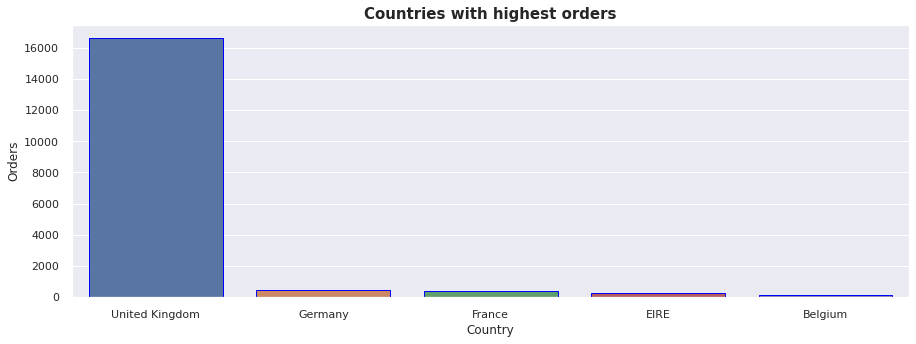

In [ ]:
# Let's plot a bar plot to visualize the top 5 countries with most orders placed

plt.figure(figsize = (15,5))
sns.barplot(x = 'Country', y = 'Orders', data = country_ord.head(5), edgecolor = 'blue')
plt.title ('Countries with highest orders' , weight = 'bold', fontsize = 15)
plt.show();

**'United kingdom' here also topped with most order placed compared to other countries.**

###**3. Let's analyse top 5 countries with orders in mass quantity.**

In [ ]:
# First let's see the dataframe of top 5 countries with orders in mass quantity

country_quant= cust_df.groupby('Country')['Quantity'].mean().reset_index().sort_values('Quantity', ascending = False)
country_quant.rename(columns = {'Quantity' : 'Avg_quant'}, inplace = True)
country_quant.head()

,Country,Avg_quant
23,Netherlands,85.034702
19,Japan,81.046729
31,Sweden,80.173333
0,Australia,71.114020
8,Czech Republic,26.840000


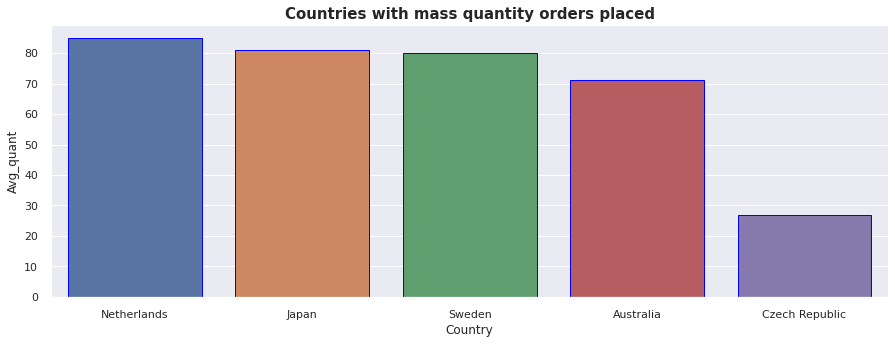

In [ ]:
# Let's plot a bar plot to visualize the top 5 countries with most orders placed

plt.figure(figsize = (15,5))
sns.barplot(x = 'Country', y = 'Avg_quant', data = country_quant.head(5), edgecolor = 'blue')
plt.title ('Countries with mass quantity orders placed' , weight = 'bold', fontsize = 15)
plt.show();

**It is clear from above that orders with mass quantity placed by the customer from Netherlands.**

###**4. Let's analyse top 5 items with most purchased according to quantity.**

In [ ]:
# First let's see the dataframe of top 5 items with most purchesed according to quantity

desc_quant = cust_df.groupby('Description')['Quantity'].sum().reset_index().sort_values('Quantity', ascending = False)
desc_quant.head()

,Description,Quantity
2319,"PAPER CRAFT , LITTLE BIRDIE",80995
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916
3786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
1762,JUMBO BAG RED RETROSPOT,46078
3698,WHITE HANGING HEART T-LIGHT HOLDER,36706


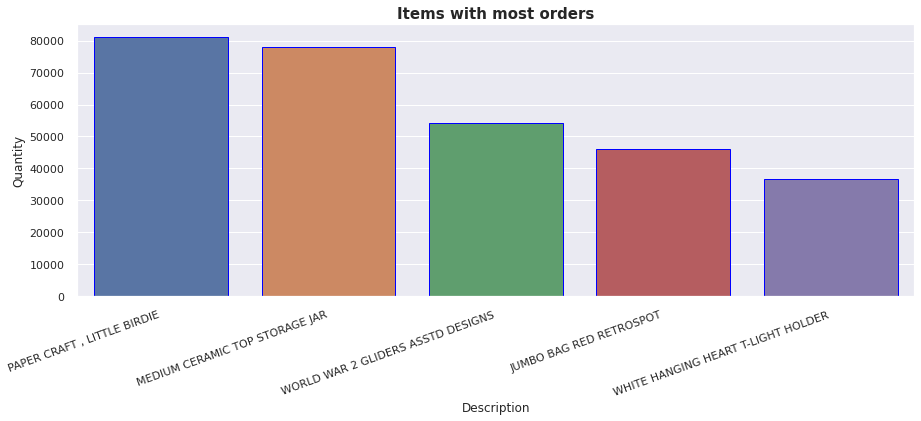

In [ ]:
# Let's plot a bar plot to visualize the top 5 items with most purchesed according to quantity

plt.figure(figsize = (15,5))
sns.barplot(x = 'Description', y = 'Quantity', data = desc_quant.head(5), edgecolor = 'blue')
plt.title('Items with most orders', weight = 'bold', fontsize = 15)
plt.xticks(rotation = 20, ha = 'right')
plt.show();

**From above plot it can be stated that 'PAPER CRAFT , LITTLE BIRDIE' , 'MEDIUM CERAMIC TOP STORAGE JAR'  these are the top 2 items with most purchased in quantity.**		

###**5. Let's analyse top 5 items with highest total amount.**

In [ ]:
# First let's see the dataframe of top 5 items with highest total amount.

desc_amount = cust_df.groupby('Description')['Total Amount'].sum().reset_index().sort_values('Total Amount', ascending = False)
desc_amount.head()

,Description,Total Amount
2319,"PAPER CRAFT , LITTLE BIRDIE",161990
2767,REGENCY CAKESTAND 3 TIER,131322
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916
2611,POSTAGE,77797
3698,WHITE HANGING HEART T-LIGHT HOLDER,77568


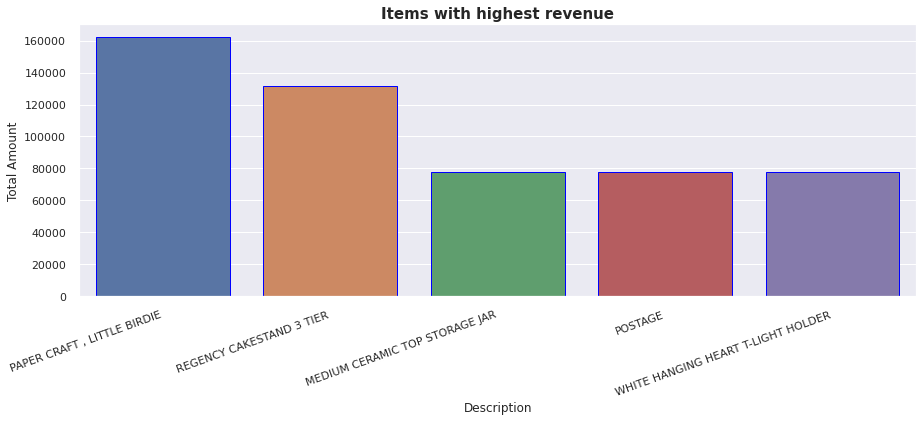

In [ ]:
# Let's plot a bar plot to visualize the top 5 items with highest total amount.

plt.figure(figsize = (15,5))
sns.barplot(x = 'Description', y = 'Total Amount', data = desc_amount.head(5), edgecolor = 'blue')
plt.title('Items with highest revenue', weight  = 'bold', fontsize = 15)
plt.xticks(rotation = 20, ha = 'right')
plt.show();

**It can be stated that 'PAPER CRAFT , LITTLE BIRDIE' product has made highest revenue.**	

###**6. Let's analyse top 5 items purchased by most customer.**

In [ ]:
# First let's see the dataframe of top 5 items purchased by most customer.

item_customer = cust_df.groupby('Description')['CustomerID'].nunique().reset_index().sort_values('CustomerID', ascending = False)
item_customer.rename(columns = {'CustomerID' : 'Customer_count'}, inplace = True)
item_customer.head()

,Description,Customer_count
2767,REGENCY CAKESTAND 3 TIER,881
3698,WHITE HANGING HEART T-LIGHT HOLDER,856
2345,PARTY BUNTING,708
216,ASSORTED COLOUR BIRD ORNAMENT,678
3001,SET OF 3 CAKE TINS PANTRY DESIGN,640


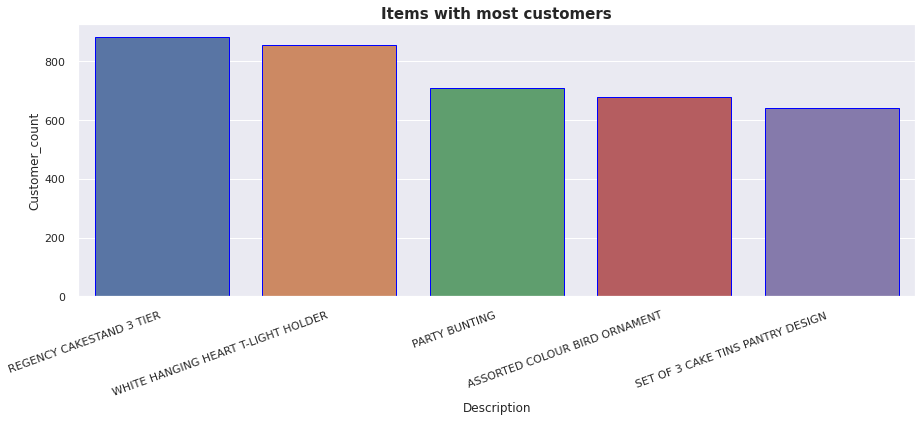

In [ ]:
# Let's plot a bar plot to visualize the top 5 items purchased by most customer.

plt.figure(figsize = (15,5))
sns.barplot(x = 'Description', y = 'Customer_count', data = item_customer.head(5), edgecolor = 'blue')
plt.title('Items with most customers', weight = 'bold', fontsize = 15)
plt.xticks(rotation = 20, ha = 'right')
plt.show();

**Item 'REGENCY CAKESTAND 3 TIER'	is the choice of most of the customer.**

#**Model Building**

##**RFM MODEL**

**Before applying any clustering algorithms it is always necessary to determine various quantitative factors on which the algorithm will perform segmentation. Examples of these would be features such as total amount spend by the particular customer, how frequent the customer visit the shop or what is the last visit of the customer.**

###**What is RFM ?**

**RFM Model which stands for Recency, Frequency and Monetary is one of such steps in which we determine the followings.**

* **Recency : How recently did the customer visit our website or how recently did the customer purchase.** 

* **Frequency : How often do they visit or how often do they purchase.**

* **Monetary : How much revenue we get from their visit or how much do they spend when they purchase.**

**However, these approach does not require machine learning algorithms as segmentation can be done manually.**

###**Why it is needed ?**

**RFM analysis is a marketing framework that is used to understand and analyze customer behaviour based on the above three factors Recency, Frequency and Monetary.**

**The RFM analysis will help the businesses to segment their customer base into different homogenous groups so that they  can engage with each group with different targeted marketing strategies.**

In [ ]:
# Let's first make a copy of the original dataset on which the model building will be done.

customer_df = cust_df.copy()

**Formula ➡**

* **Recency = Latest Date - Last Inovice Date.**
* **Frequency = count of invoice no. of transaction(s).** 
* **Monetary = Sum of Total Amount for each customer.**

In [ ]:
customer_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month', 'day', 'hour',
       'Total Amount', 'Time_type'],
      dtype='object')

In [ ]:
import datetime as dt

# First let's set latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase

Latest_Date  = dt.datetime(2011,12,10)

# Create RFM Modelling scors for each customer

rfm_df = customer_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days,
                                                'InvoiceNo': lambda x: len(x),
                                                'Total Amount': lambda x: x.sum()})

# Convert Invoice Date into type int

rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# Rename column names to Recency, Frequency and Monetary

rfm_df.rename(columns={'InvoiceDate': 'Recency',
                       'InvoiceNo': 'Frequency',
                       'Total Amount': 'Monetary'}, inplace = True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,74215
1,12347,2,182,3012
2,12348,75,31,944
3,12349,18,73,1404
4,12350,310,17,244


**Interpretation of above dataframe :**

1. Recency : How recent a customer made a purchase.
2. Frequency : How often a customer makes a purchase.
3. Monetary : How much money a customer spends in total.

In [ ]:
# Calculating R,F & M scores by splitting Recency, Frequency & Monetary based on quantities

rfm_df['R'] = pd.qcut(rfm_df['Recency'], q = 4, labels = [1,2,3,4]).astype(int)
rfm_df['F'] = pd.qcut(rfm_df['Frequency'], q = 4, labels = [4,3,2,1]).astype(int)
rfm_df['M'] = pd.qcut(rfm_df['Monetary'], q = 4, labels = [4,3,2,1]).astype(int)

# Finding the RFM group for each customer by combining the factors R, F & M

rfm_df['RFM_Group'] = 100*rfm_df['R'] + 10*rfm_df['F'] + rfm_df['M']

# Finding RFM score for each customer by adding the factors R, F & M

rfm_df['RFM_Score'] = rfm_df['R'] + rfm_df['F'] + rfm_df['M']

In [ ]:
# Let's see the dataframe afterr adding different columns

rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score
CustomerID,,,,,,,,
12346,325,1,74215,4,4,1,441,9
12347,2,182,3012,1,1,1,111,3
12348,75,31,944,3,3,2,332,8
12349,18,73,1404,2,2,1,221,5
12350,310,17,244,4,4,3,443,11


**Interpretation of above dataframe :**
* If the R,F & M of any customer is 111, then we can say that the customers Recency is very good that means customer visited store very recently, Frequency is also very good for the resepective customer that means number of time the customer visited store is very high and also Monetary is very good for the customer which means the customer spend considerably high amount during his/her total visit at store.

* If the R,F & M of any customer is 444, then we can say that the customers Recency is very bad that means customer visited store while back, Frequency is also very bad for the resepective customer that means number of time the customer visited store is very less and also Monetary is very bad for the customer which means the customer spend very low amount during his/her total visit at store.

* If the R,F & M of any customer is 411, then we can say that the customer purchased long time ago but buys frequently and spends more

Like that we can come up with number of segments for all combinations of R,F & M. Lower the RFM score more valuable the customer is.

In [ ]:
# Let's understand the Descriptive Statistics of different columns in the above dataset

rfm_col = ['Recency', 'Frequency', 'Monetary']

for i in rfm_col:
  print('\n')
  print(f'Statistical Description of the feature : {i}')
  print('--'*25)
  print(rfm_df[i].describe([0.75, 0.90, 0.95, 0.99]))



Statistical Description of the feature : Recency
--------------------------------------------------
count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
50%        50.000000
75%       141.500000
90%       262.200000
95%       311.000000
99%       368.620000
max       373.000000
Name: Recency, dtype: float64


Statistical Description of the feature : Frequency
--------------------------------------------------
count    4339.000000
mean       90.512100
std       225.515328
min         1.000000
50%        41.000000
75%        98.000000
90%       202.200000
95%       308.000000
99%       655.620000
max      7676.000000
Name: Frequency, dtype: float64


Statistical Description of the feature : Monetary
--------------------------------------------------
count      4339.000000
mean       1467.902282
std        7003.601643
min           0.000000
50%         458.000000
75%        1126.500000
90%        2535.600000
95%        4121.800000
99%       14702.020000
ma

**As it is clear from above that 'min' value of all the 3 columns are 0, which will give error in the transformations, we will treat them in further analysis.**

In [ ]:
# Handling zeros in the dataframe to avid error in the transformations

# Let's define a function to treat the zeros of the above dataframe

def zero_removal(num):
  if (num == 0):
    return 1
  else:
    return num

# Let's apply 'zero_removal' function to 'Recncy', 'Frequency' & 'Monetary' columns

rfm_df['Recency'] = [zero_removal(x) for x in rfm_df['Recency']]
rfm_df['Frequency'] = [zero_removal(x) for x in rfm_df['Frequency']]
rfm_df['Monetary'] = [zero_removal(x) for x in rfm_df['Monetary']]

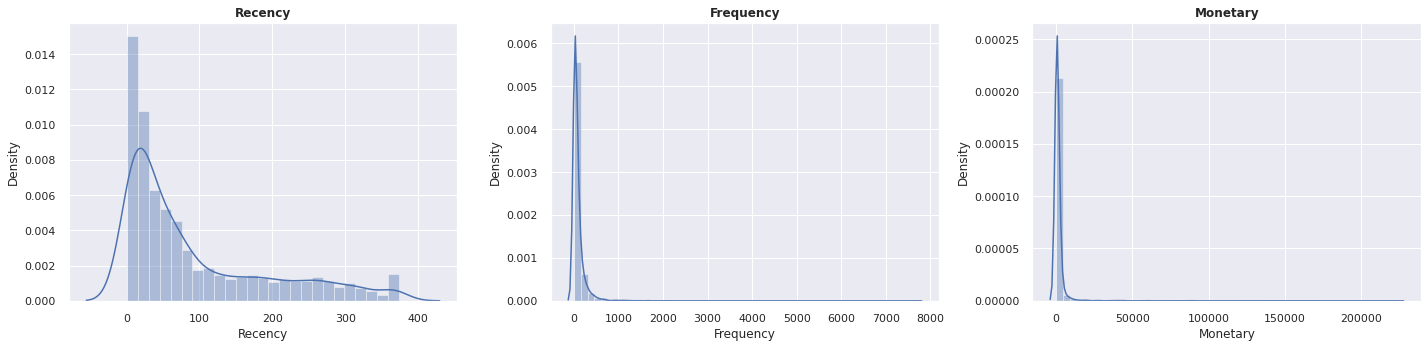

In [ ]:
# Visualizing the distributions of different columns

plt.figure(figsize = (20,5))
for n,col in enumerate (rfm_col) :
  plt.subplot(1,3,n+1)
  sns.distplot(rfm_df[col])
  plt.title(col.title(), weight = 'bold')
  plt.tight_layout()

**It can be seen from above that 'Recency', 'Frequency' & 'Monetary' columns are very much rightly skewed (Positive skewed), we will treat them by applying log transformation.**

In [ ]:
# Applying Log Transformation on columns for smoothing the distribution

rfm_df['Recency_log'] = rfm_df['Recency'].apply(np.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(np.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(np.log)

In [ ]:
# Let's see the dataframe after adding new columns

rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,,,,,,
12346,325,1,74215,4,4,1,441,9,5.783825,0.000000,11.214722
12347,2,182,3012,1,1,1,111,3,0.693147,5.204007,8.010360
12348,75,31,944,3,3,2,332,8,4.317488,3.433987,6.850126
12349,18,73,1404,2,2,1,221,5,2.890372,4.290459,7.247081
12350,310,17,244,4,4,3,443,11,5.736572,2.833213,5.497168


In [ ]:
# Checking Descriptive Statistics of the Dataframe

rfm_df.describe()

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,Recency_log,Frequency_log,Monetary_log
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,92.049551,90.512100,1467.910348,2.493893,2.512330,2.502881,277.015441,7.509103,3.736880,3.670868,6.153824
std,100.000372,225.515328,7003.599953,1.122159,1.122724,1.120116,118.406990,2.802982,1.474527,1.321685,1.408153
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,111.000000,3.000000,0.000000,0.000000,0.000000
25%,17.000000,17.000000,200.000000,1.000000,2.000000,1.500000,144.000000,5.000000,2.833213,2.833213,5.298317
50%,50.000000,41.000000,458.000000,2.000000,3.000000,3.000000,244.000000,8.000000,3.912023,3.713572,6.126869
75%,141.500000,98.000000,1126.500000,3.500000,4.000000,4.000000,377.500000,10.000000,4.952293,4.584967,7.026870
max,373.000000,7676.000000,223987.000000,4.000000,4.000000,4.000000,444.000000,12.000000,5.921578,8.945854,12.319343


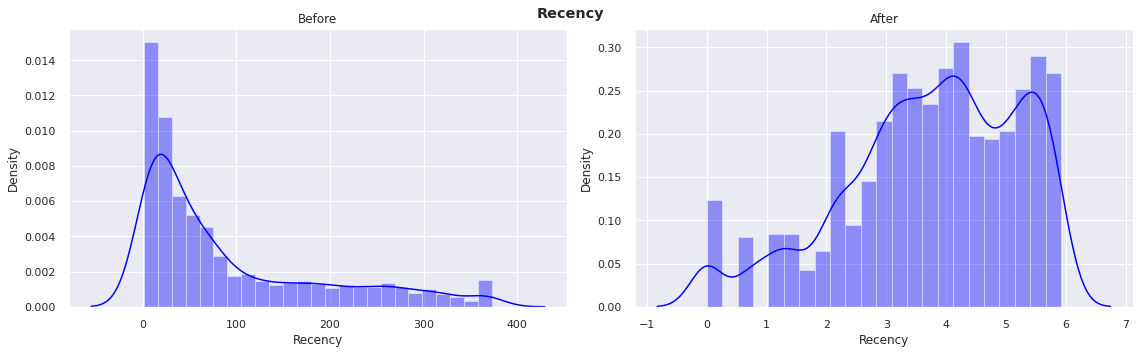

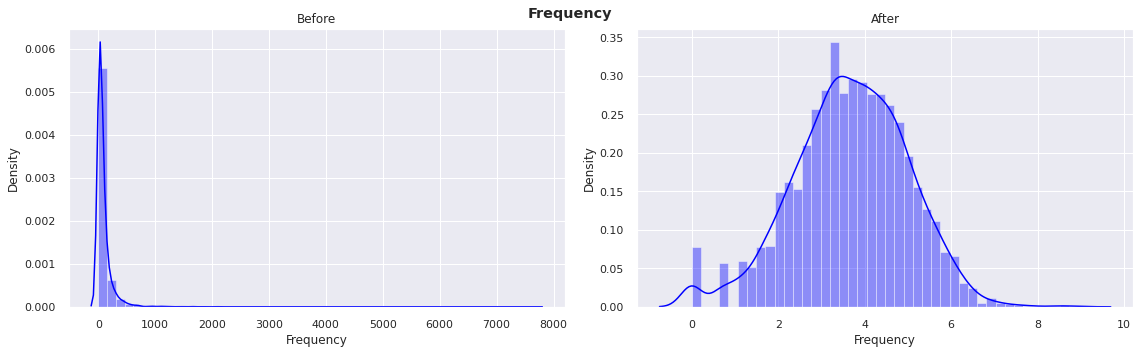

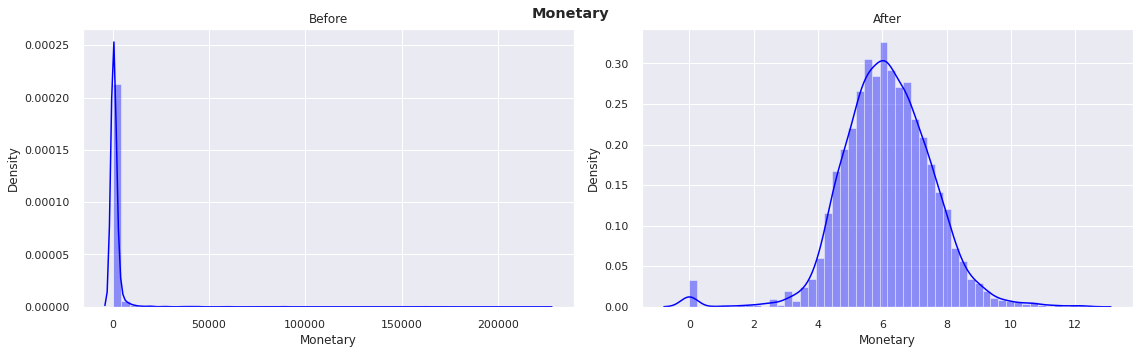

In [ ]:
# Visualizing the disatributions before and after the log transformation

target_column = ['Recency', 'Frequency', 'Monetary']

for column in target_column :
  fig, axes = plt.subplots(1, 2, figsize= (16,5) )
  sns.distplot(rfm_df[column], ax = axes[0], color = 'blue').set(title = 'Before')
  sns.distplot(np.log(rfm_df[column]), ax = axes[1], color = 'blue').set(title = 'After')
  plt.suptitle(f'{column.title()}',weight='bold')
  plt.tight_layout()
  fig.show()

**Observations**

* Earlier the distributions of Recency, Frequency and Monetary columns were positively skewed but after applying log transformation the distributions appear to be symmetrical and normally distributed.

* It will be more suitable to use the transformed features for better visualization of clusters.

###**Visualizing the correlations among RFM features.**

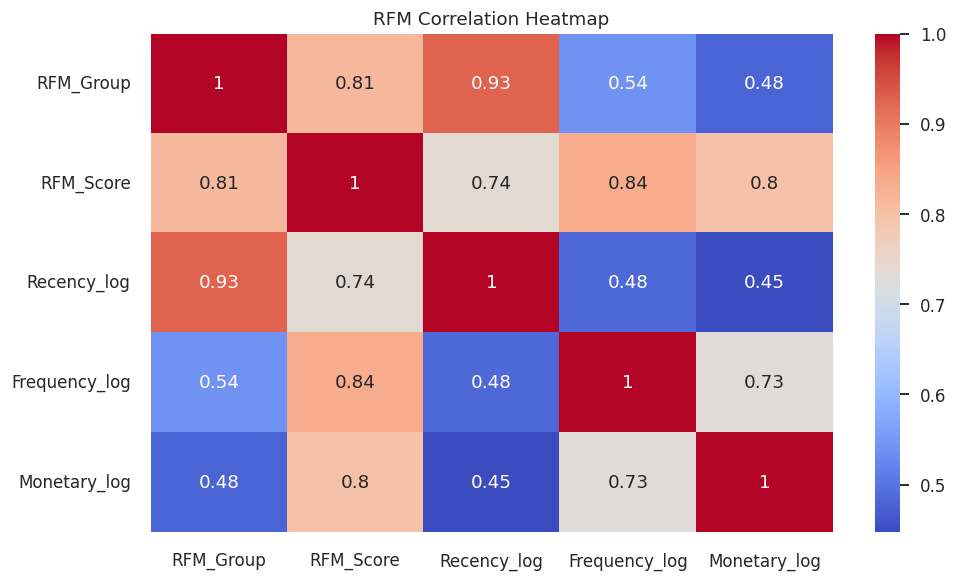

In [ ]:
rfm_coll = ["RFM_Group", "RFM_Score", "Recency_log", "Frequency_log", "Monetary_log"]

plt.figure(figsize = (10,6), dpi = 110)
sns.heatmap(abs(rfm_df[rfm_coll].corr()), annot = True, cmap = 'coolwarm')
plt.title('RFM Correlation Heatmap')
plt.show()

* **It is clear from above that 'Recency' is highly correlated with RFM_Group value , whereas Frequency and Monetary is moderately correlated with RFM_Group.**
* **Also RFM_Score is equally correlated with 'Recency',  'Frequency' and 'Monetary'.**

* **Note :**
        * RFM_Group : It is the concatination of R,F and M scores.
        * RFM_Score : It is the summation of R,F & M scores.

## **Feature Scaling**

In [ ]:
# Let's Define X Variable

X = rfm_df[['Recency_log', 'Frequency_log', 'Monetary_log']]

In [ ]:
# Let's Scale the variables with the help of StandardScaler method.

X = StandardScaler().fit_transform(X)

:* **Mean and Standard Deviation of values in the RFM features after scaling are 0 and 1 respectively.**

##**Clustering**

In [ ]:
# Saving the result in results variable

results = {}

# Let's define a function to remove the outliers

def treating_outliers(col) :
  '''
     This above function takes a column and removes the outliers
     col : The respective column which is to be cleaned    
  '''
  col_q1 = col.quantile(0.25)
  col_q3 = col.quantile(0.75)
  col_iqr = col_q3 - col_q1
  condition_1 = (col >= col_q1 - 1.5 * col_iqr)
  condition_2 = (col <= col_q3 + 1.5 * col_iqr)
  return col[condition_1 & condition_2]

# Now let's define a function for displaying the mean and median of Recency, Frequency and Monetary for each group of customers

def cluster_stats(dataset, segment) :
  '''
   This above function returns the mean , median  and count of Recency, Frequency and Monetary for each group of customers
  '''
  statistic = dataset[['Recency', 'Frequency', 'Monetary', segment]].groupby(segment).agg(['mean', 'median'])
  statistic['count'] = dataset[segment].value_counts()

# Let's store 0.25th and 0.75th quantile of Recency, Frequency & Monetary for each group of customers

  result = dataset[['Recency', 'Frequency', 'Monetary', segment]].groupby(segment).agg({
                  'Recency' : lambda x : f'{int(x.quantile(0.25))} to {int(x.quantile(0.75))} days ago',
                  'Frequency' : lambda x : f'Bought {int(x.quantile(0.25))} to {int(x.quantile(0.75))} times',
                  'Monetary' : lambda x : f'Spend around {int(x.quantile(0.25))} to {int(x.quantile(0.75))} Pound Sterling',
                   })

  # Let's rename the columns
  statistic.columns = [f"{i}  {j}" for i , j in statistic.columns]
  result.columns = ['Last visited', 'Purchase frequency', 'Amount spent']
 
  return statistic, result


# Now let's define function for plotting clusters for visualization

def plot_statistic_result(y,segment, title) :
  '''
    This above function plots the clusters for the given data and returns the dataframes for the clusters with conclusions and stats
  '''
  rfm_df[segment] = y
  groups = sorted(rfm_df[segment].unique())

  # Let's save the outputs in respective variable

  statistic, result = cluster_stats(rfm_df, segment)

# Visualizing the scatter plots for all clusters

  plt.figure(figsize = (20,6), dpi = 90)
  ax = plt.axes(projection = '3d')
  ax.set_xlabel('Recency', fontweight = 'bold')
  ax.set_ylabel('Frequency', fontweight = 'bold')
  ax.set_zlabel('Monetary', fontweight = 'bold')
  ax.set_title(title, fontweight = 'bold')
  ax = ax.scatter(X[:,0], X[:,1], X[:,2] , c = y, cmap = 'rainbow')
  plt.legend(*ax.legend_elements(), prop = {'size' : 15})

  # Plotting the distribution of Recency, Frequency and Monetary columns for each group of customers
  
  fig, ax = plt.subplots(3, figsize = (16,16), dpi = 90)
  for i in groups :
     for index, col in enumerate(['Recency', 'Frequency', 'Monetary']) :
       sns.distplot(treating_outliers(rfm_df[rfm_df[segment] == i][col]), ax = ax[index], kde_kws = dict(linewidth = 3))
       ax[index].set_title(f'{col} distribution', fontweight = 'bold')
       ax[index].legend(groups, prop = {'size' :15})
       
  plt.show()


  # Displaying the statistic and result

  print('\n')
  print('Displaying the mean, median of Recency, Frequency and Monetary for each group of customer')
  print('--'*40)
  display(statistic.reset_index().style.hide_index().background_gradient(cmap="rainbow"))
  print('\n')
  print('Displaying the summary for each group of customer')
  print('--'*40)
  display(result.reset_index().style.set_properties(**{'text-align': 'middle'}).hide_index().background_gradient(cmap="rainbow"))

  return statistic, result

###**RFM Score Binning**

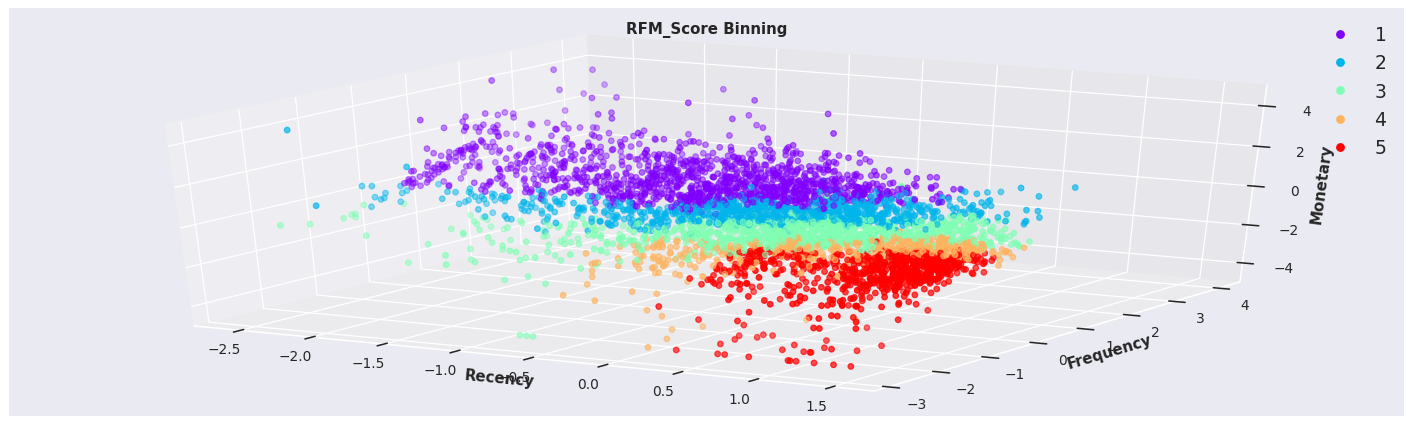

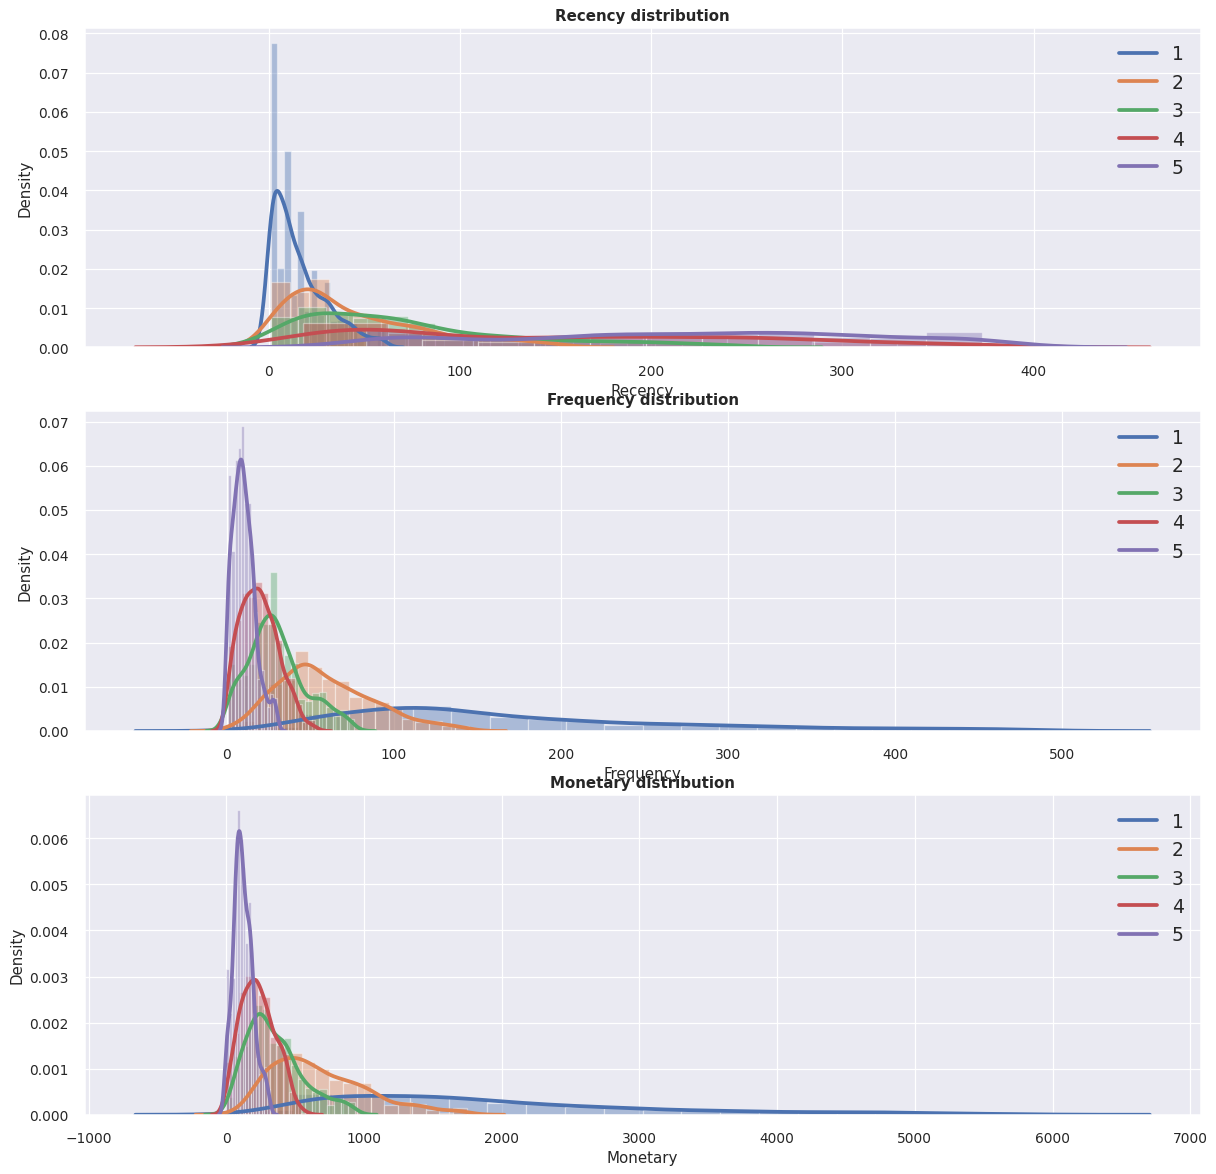



Displaying the mean, median of Recency, Frequency and Monetary for each group of customer
--------------------------------------------------------------------------------


Binning RFM_Score,Recency mean,Recency median,Frequency mean,Frequency median,Monetary mean,Monetary median,count
1,19.497600,12.000000,227.270400,147.000000,3774.648000,1754.500000,1250
2,54.035068,36.000000,66.074661,56.000000,1000.200226,636.000000,884
3,89.537378,64.000000,33.509209,29.000000,583.310943,330.000000,923
4,150.107004,138.000000,21.295720,19.000000,247.933852,224.000000,514
5,218.054688,225.000000,10.884115,10.000000,131.434896,117.000000,768




Displaying the summary for each group of customer
--------------------------------------------------------------------------------


Binning RFM_Score,Last visited,Purchase frequency,Amount spent
1,4 to 27 days ago,Bought 100 to 252 times,Spend around 1078 to 3000 Pound Sterling
2,18 to 72 days ago,Bought 40 to 82 times,Spend around 421 to 953 Pound Sterling
3,31 to 119 days ago,Bought 19 to 42 times,Spend around 210 to 502 Pound Sterling
4,57 to 236 days ago,Bought 11 to 28 times,Spend around 141 to 329 Pound Sterling
5,149 to 289 days ago,Bought 5 to 15 times,Spend around 76 to 173 Pound Sterling


In [ ]:
# Splitting RFM_Score in 5 bins based on quantiles

y = pd.qcut(rfm_df['RFM_Score'], q=5, labels=[1,2,3,4,5]).astype(int)

# Plotting Different Segments for Visualization

title = 'RFM_Score Binning'
segment = 'Binning RFM_Score'
results[segment] = plot_statistic_result(y, segment, title)

In [ ]:
# Manually creating a list of customer type according to RFM_Score Binning

Customer_Type = ['Best Customer 🥇', 'Good Customers 🥈', 'Average Customers 🥉', 'Risky to Churn segment customers ❤', 'Churned Customers 💔']

# Storing the results dataframe into a variable

Score_df = results['Binning RFM_Score'][1].reset_index()

# Let's see the dataframe to understand customer type according to results of different clusters.

Score_df = Score_df.assign(Customer_Type = Customer_Type)

# Let's print the dataframe

Score_df

,Binning RFM_Score,Last visited,Purchase frequency,Amount spent,Customer_Type
0,1,4 to 27 days ago,Bought 100 to 252 times,Spend around 1078 to 3000 Pound Sterling,Best Customer 🥇
1,2,18 to 72 days ago,Bought 40 to 82 times,Spend around 421 to 953 Pound Sterling,Good Customers 🥈
2,3,31 to 119 days ago,Bought 19 to 42 times,Spend around 210 to 502 Pound Sterling,Average Customers 🥉
3,4,57 to 236 days ago,Bought 11 to 28 times,Spend around 141 to 329 Pound Sterling,Risky to Churn segment customers ❤
4,5,149 to 289 days ago,Bought 5 to 15 times,Spend around 76 to 173 Pound Sterling,Churned Customers 💔


###**RFM Group Binning**

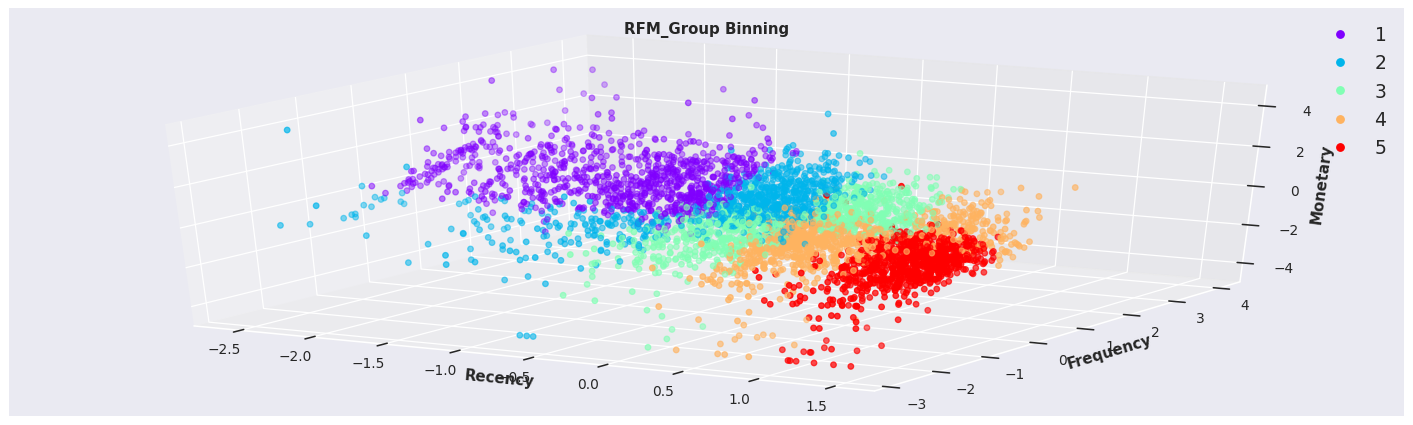

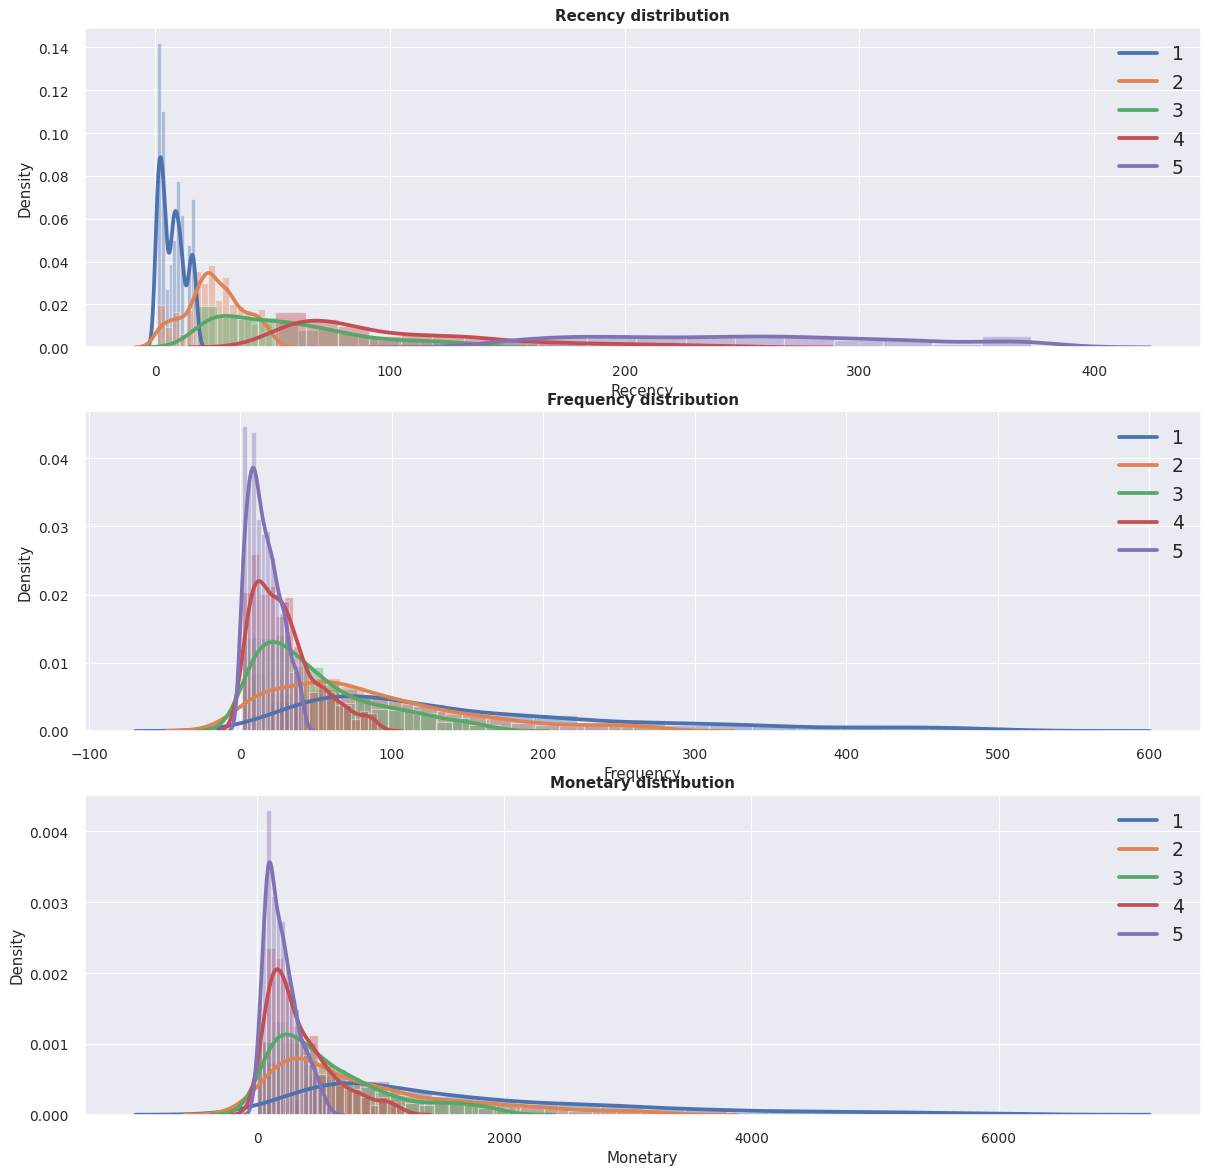



Displaying the mean, median of Recency, Frequency and Monetary for each group of customer
--------------------------------------------------------------------------------


Binning RFM_Group,Recency mean,Recency median,Frequency mean,Frequency median,Monetary mean,Monetary median,count
1,7.493896,7.000000,226.724750,126.000000,3911.526082,1467.000000,901
2,25.327081,25.000000,108.466589,76.000000,1632.607268,703.000000,853
3,56.987074,51.000000,59.983549,42.000000,788.172738,488.000000,851
4,120.543779,93.000000,35.965438,26.500000,495.162442,294.000000,868
5,251.638568,247.500000,15.781755,14.000000,406.267898,179.000000,866




Displaying the summary for each group of customer
--------------------------------------------------------------------------------


Binning RFM_Group,Last visited,Purchase frequency,Amount spent
1,3 to 11 days ago,Bought 70 to 250 times,Spend around 756 to 2934 Pound Sterling
2,18 to 33 days ago,Bought 42 to 136 times,Spend around 319 to 1519 Pound Sterling
3,31 to 74 days ago,Bought 20 to 81 times,Spend around 231 to 959 Pound Sterling
4,70 to 143 days ago,Bought 13 to 44 times,Spend around 156 to 573 Pound Sterling
5,196 to 302 days ago,Bought 7 to 23 times,Spend around 98 to 299 Pound Sterling


In [ ]:
# Splitting RFM_Group in 5 bins based on quantiles

y = pd.qcut(rfm_df['RFM_Group'], q=5, labels=[1,2,3,4,5]).astype(int)

# Plotting Different Segments for Visualization

title = 'RFM_Group Binning'
segment = 'Binning RFM_Group'
results[segment] = plot_statistic_result(y, segment, title)

In [ ]:
# Mannually creating a list of Customer type according to RFM_Group Binning

Customer_Type = ['Best Customers 🥇 ', 'Good Customers 🥈', 'Average Customers 🥉', 'Risky to Churn segment customers ❤', 'Churned Customers 💔']

# Storing the results dataframe into a variable

Group_df = results['Binning RFM_Group'][1].reset_index()

# Let's see the dataframe to understand customer type